In [1]:
from openvino.inference_engine import IECore
import cv2
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Personal\AppData\Roaming\Python\Python39\site-packages\ipykernel\pylab\config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
ie = IECore()
net = ie.read_network(
    model = 'person-detection-0200.xml',
    weights = 'person-detection-0200.bin'
)

model = ie.load_network(net, "CPU")

(500, 750, 3)


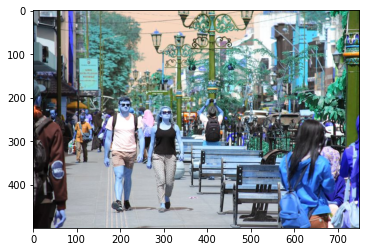

In [3]:
img = cv2.imread('malioboro.jpg')
print(img.shape)
plt.imshow(img)

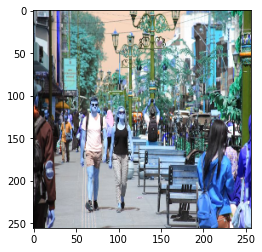

In [4]:
resized = cv2.resize(img, (256, 256))
resized.shape
plt.imshow(resized)

In [7]:
transposed = np.transpose(resized, (2,0,1))
transposed.shape

(3, 256, 256)

In [8]:
input_image = np.array([transposed], dtype=np.float32)
input_image.shape

(1, 3, 256, 256)

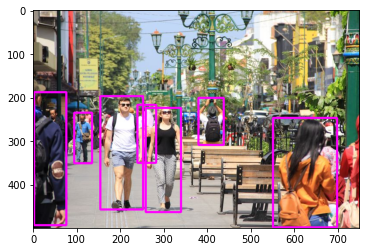

In [11]:
result = model.infer({"image" : input_image})
output_image = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
for i in result['detection_out'][0,0]:
    if i[2] >= 0.5: # mencetak kotak bila keyakinan model lebih dari 50%
        tinggi, lebar, channel = output_image.shape
        cv2.rectangle(
            output_image,
            (int(lebar*i[3]), int(tinggi*i[4])),
            (int(lebar*i[5]), int(tinggi*i[6])),
            (255,0,255),3
        )
plt.imshow(output_image)

In [14]:
final_image = cv2.cvtColor(output_image.copy(), cv2.COLOR_BGR2RGB)
cv2.imwrite("malioboro_identificated.jpg", final_image)

True